Cell 1 - Required Modules

In [1]:
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import numpy as np
from scipy.misc import imread
from PIL import Image
%matplotlib inline

Next Two Cells - Import and displays unmodified image

In [2]:
img = Image.open('D:/CW Spectral Eval/Canon_Photos/File038.tiff')

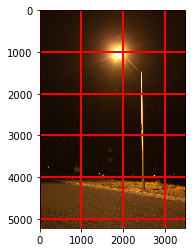

In [3]:
plt.imshow(img)
plt.grid(b=True, which ='major', color='r', linewidth = 2)

Next Three Cells - The next three cells is a manual process.  It selects the region of interest to analyze, and reduces the pixel size so that subsequent analysis may be performed within a reasonable time period (less than 5 minutes).

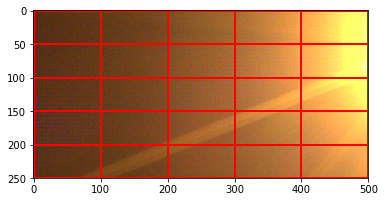

In [4]:
img = img.crop((1250, 1000, 1750, 1250))
plt.imshow(img)
plt.grid(b=True, which ='major', color='r', linewidth =2)

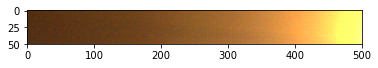

In [5]:
img = img.crop((0, 0, 500, 50))
plt.imshow(img)

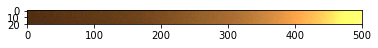

In [6]:
img = img.crop((0, 0, 500, 20))
plt.imshow(img)

Next Cell - saves reduced sized file for the analysis below, and reads the new (smaller file) as an array of float numbers

In [7]:
img.save('D:/CW Spectral Eval/Canon_Photos/img.jpg')
img = imread('D:/CW Spectral Eval/Canon_Photos/img.jpg').astype(np.float32)

Next Two Cells - establishes the r,g,b array as one r array, one g array, and one b array

In [8]:
def rgbw(img):
    red, green, blue = np.zeros(shape=(img.shape[0], img.shape[1], 3)), np.zeros(shape=(img.shape[0], img.shape[1], 3)), np.zeros(shape=(img.shape[0], img.shape[1], 3))
    red[:,:,0], green[:,:,1], blue[:,:,2] = img[:,:,0], img[:,:,1], img[:,:,2]
    blue_, green_, red_ = pd.DataFrame(blue[:,:,2]), pd.DataFrame(green[:,:,1]),pd.DataFrame(red[:,:,0])
    return red_, green_ , blue_, red, green, blue

red_, green_, blue_, red, green, blue = rgbw(img)

In [9]:
red = red.astype(np.uint8)
green = green.astype(np.uint8)
blue = blue.astype(np.uint8)

Next Two Cells - Crops the data for values greater than or equal to 30, and less than or equal to 240 (to eliminate saturated pixels, or pixels closer to the noise floor)  AND displays the results

In [10]:
red[red < 30] = 0
red[red > 240] = 0
green[:,:,1][red[:,:,0] == 0] = 0
blue[:,:,2][red[:,:,0] == 0] = 0

blue[blue < 30] = 0
blue[blue > 240] = 0
green[:,:,1][blue[:,:,2] == 0] = 0
red[:,:,0][blue[:,:,2] == 0] = 0

green[green < 30] = 0
green[green > 240] = 0
red[:,:,0][green[:,:,1] == 0] = 0
blue[:,:,2][green[:,:,1] == 0] = 0

img = red + green + blue

np.amax(green), np.amax(red), np.amax(blue), np.amax(img)

(163, 240, 74, 240)

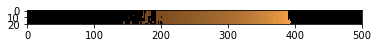

In [11]:
plt.imshow(img)

Next Cell - Test of data; does not contribute to the program

In [12]:
# plt.hist(red.ravel(),40,[0,280], color='r', alpha =0.4); plt.ylim(0,200); plt.show()
# plt.hist(green.ravel(),40,[0,280], color='g', alpha =0.4); plt.ylim(0,250); plt.show()
# plt.hist(blue.ravel(),40,[0,280], color='b', alpha =0.4); plt.ylim(0,800); plt.show()

np.average(red), np.average(green), np.average(blue)
np.sum(red), np.sum(green), np.sum(blue), len(red), len(green), len(blue)

(687939, 443148, 197141, 20, 20, 20)

Next Two Cells - Saves and reads the file to take advantage of the CV2 resources.

In [13]:
cv2.imwrite('D:/Python_Database/test_thresh1.png', red)
cv2.imwrite('D:/Python_Database/test_thresh2.png', green)
cv2.imwrite('D:/Python_Database/test_thresh3.png', blue)

True

In [14]:
red = cv2.imread('D:/Python_Database/test_thresh1.png')
grn = cv2.imread('D:/Python_Database/test_thresh2.png')
blue = cv2.imread('D:/Python_Database/test_thresh3.png')

red = np.float64(red)
grn = np.float64(grn)
blue = np.float64(blue)

red.shape, grn.shape, blue.shape 

((20L, 500L, 3L), (20L, 500L, 3L), (20L, 500L, 3L))

In [15]:
def four_channel(array):
    r_channel, g_channel, b_channel = cv2.split(array)
    a_channel = np.ones((array.shape[0], array.shape[1]))*0
    array = cv2.merge((r_channel, g_channel, b_channel, a_channel))
    return array

alp_red = four_channel(red)
alp_grn = four_channel(grn)
alp_blue = four_channel(blue)
alp_img = alp_red + alp_grn + alp_blue

In [16]:
def background(array,n):
    array[:,:,3][array[:,:,n] != 0] = 255
    return array

alp_red = background(alp_red,0)
alp_grn = background(alp_grn,1)
alp_blue = background(alp_blue,2)

In [17]:
np.amax(alp_red[:,:,0]), np.amax(alp_grn[:,:,1]), np.amax(alp_blue[:,:,2])

(240.0, 163.0, 74.0)

In [18]:
alp_img.shape

(20L, 500L, 4L)

In [19]:
r, g, b = [], [], []

for i, row in enumerate(alp_img):
    for j, pixel in enumerate(row):
        tempr = pixel[0]
        tempg = pixel[1]
        tempb = pixel[2]
        
        r.append(tempr), g.append(tempg), b.append(tempb)

In [20]:
r1 = filter(lambda a: a != 0, r)
g1 = filter(lambda a: a != 0, g)
b1 = filter(lambda a: a != 0, b)
r2, g2, b2 = sum(r1)/len(r1), sum(g1)/len(g1), sum(b1)/len(b1) 
r2, g2, b2

(166.69227041434456, 107.37775623939908, 47.768597043857525)

In [21]:
from mpl_toolkits.mplot3d import Axes3D

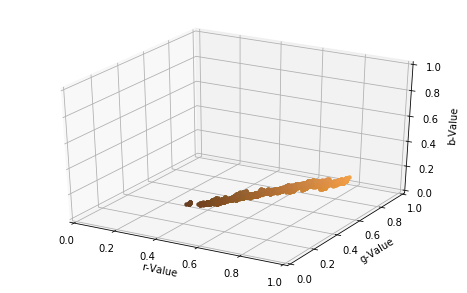

In [22]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection = '3d')

for i in range(len(r1)):
    ax.scatter(r1[i]/255, g1[i]/255, b1[i]/255, c=[r1[i]/255, g1[i]/255, b1[i]/255], lw=0, marker='o', alpha=1)

ax.scatter(r2/255, g2/255, b2/255, c=[r2/255,g2/255,b2/255], marker='o', s = 55, lw=0, alpha=1)

ax.set_xlim3d(0, 1)
ax.set_ylim3d(0, 1)
ax.set_zlim3d(0, 1)

ax.set_xlabel('r-Value')
ax.set_ylabel('g-Value')
ax.set_zlabel('b-Value')

In [23]:
# fig = plt.figure(figsize=(8,5))
# ax = fig.add_subplot(111, projection = '3d')

# for i in range(len(r1)):
#     ax.scatter(r1[i]/255, g1[i]/255, b1[i]/255, c=[r1[i]/255, g1[i]/255, b1[i]/255], lw=0, marker='o', alpha=0.09)

# ax.scatter(r2/255, g2/255, b2/255, c=[r2/255,g2/255,b2/255], marker='o', s = 55, lw=0, alpha=1)

# ax.set_xlim3d(0, 1)
# ax.set_ylim3d(0, 1)
# ax.set_zlim3d(0, 1)

# ax.set_xlabel('r-Value')
# ax.set_ylabel('g-Value')
# ax.set_zlabel('b-Value')

In [24]:
rt, gt, bt = r2/255, g2/255, b2/255
rt, gt, bt = np.arange(0, rt, rt/100), np.arange(0, gt, gt/100), np.arange(0, bt, bt/100)
z1 = np.zeros(len(rt))
rtz, gtz, btz=[rt]*len(rt),[gt]*len(rt),[bt]*len(rt)

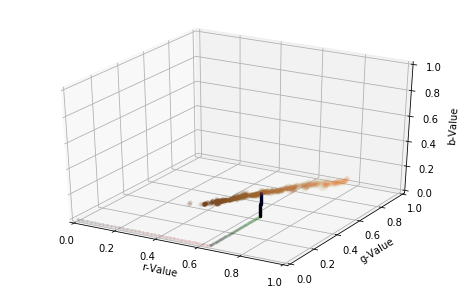

In [25]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection = '3d')

for i in range(len(r1)):
    ax.scatter(r1[i]/255, g1[i]/255, b1[i]/255, c=[r1[i]/255, g1[i]/255, b1[i]/255], lw=0, marker='o', alpha=.02)

for i in range(len(rt)):
    ax.scatter(rt[i], z1[i], z1[i], c=[rt[i], z1[i], z1[i]], s=8, marker='o', lw=0, alpha=.1)
    ax.scatter(z1[i] + max(rt), gt[i], z1[i], c=[z1[i], gt[i], z1[i]], s=10, marker='o', lw=0, alpha=.1)
    ax.scatter(z1[i] + max(rt), z1[i] + max(gt), bt[i], c=[z1[i], z1[i], bt[i]], s=10, marker='o', lw=0, alpha=1)
    ax.scatter(rt[i], gt[i], bt[i], c=[rt[i], gt[i], bt[i]], marker='o', lw=0, alpha=0)

ax.set_xlim3d(0, 1)
ax.set_ylim3d(0, 1)
ax.set_zlim3d(0, 1)

ax.set_xlabel('r-Value')
ax.set_ylabel('g-Value')
ax.set_zlabel('b-Value')

In [26]:
r1lin, g1lin, b1lin =[],[],[]
for i in range(len(r1)):
    if r1[i] <= 0.0405:
        tempr = r1[i]/12.92
    else:
        tempr = ((r1[i]+0.055)/(1.055))**2.4
        
    if g1[i] <= 0.0405:
        tempg = g1[i]/12.92
    else:
        tempg = ((g1[i]+0.055)/(1.055))**2.4
        
    if b1[i] <= 0.0405:
        tempb = b1[i]/12.92
    else:
        tempb = ((b1[i]+0.055)/(1.055))**2.4

    r1lin.append(tempr), g1lin.append(tempg), b1lin.append(tempb)
    
X,Y,Z = [],[],[]
for i in range(len(r1)):
    tempX = r1lin[i]  * 0.4124 + g1lin[i] * 0.3576 + b1lin[i] * 0.1805
    tempY = r1lin[i] * 0.2126 + g1lin[i] * 0.7152 + b1lin[i] * 0.0722
    tempZ = r1lin[i] * 0.0193 + g1lin[i] * 0.1192 + b1lin[i] * 0.9505
    X.append(tempX), Y.append(tempY), Z.append(tempZ)
    
X = filter(lambda a: a != 0, X)
Y = filter(lambda a: a != 0, Y)
Z = filter(lambda a: a != 0, Z)

X = [(i/max(Y))*100 for i in X]
Z = [(i/max(Y))*100 for i in Z]
Y = [(i/max(Y))*100 for i in Y]

# max(X), max(Y), max(Z)

In [27]:
x, y = [], []
for i in range(len(X)):
    tempx = X[i]/(X[i] + Y[i] + Z[i])
    tempy = Y[i]/(X[i] + Y[i] + Z[i])
    x.append(tempx), y.append(tempy)

In [28]:
x_avg, y_avg = sum(x)/len(x), sum(y)/len(y)
# x_avg, y_avg

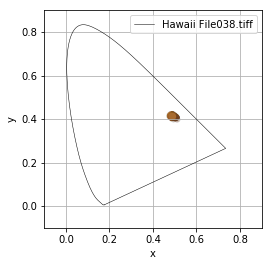

In [29]:
CIE_1931 = pd.read_csv('D:\Python_Database\CIE1931_1nm.csv')
CIE_1931 = CIE_1931.rename(columns = {CIE_1931.columns[0]:'x', CIE_1931.columns[1]:'y'})
plt.plot(CIE_1931['x'], CIE_1931['y'], c='k', linewidth = 0.5, label='Hawaii File038.tiff')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(); plt.ylim(-.1,.9); plt.xlim(-.1,.9)
plt.xlabel('x'); plt.ylabel('y')
plt.legend()

for i in range(len(x)):
    plt.scatter(x[i],y[i], c=[r1[i]/255, g1[i]/255, b1[i]/255], lw=0, alpha=.02)

plt.scatter(x_avg, y_avg, c=[r2/255,g2/255,b2/255], lw=0, s=55, alpha=1)
plt.show()